In [ ]:
! git clone https://github.com/init-sdrb/MachineLearning

Cloning into 'MachineLearning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
##Prerequisite Library to be installed first
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [ ]:
## load dataset as Pandas Dataframe
data_dir = "MachineLearning/All.csv"
# Load the training data
print("- Loading CSV Data -")
df = pd.read_csv(data_dir)
test_url = df['URL_Type_obf_Type'][1]
#df = pd.read_csv('/Users/captain/playground/FinalDataset/All.csv', low_memory=False)
print("\n### CSV Data Loaded ###\n")

- Loading CSV Data -

### CSV Data Loaded ###



In [ ]:
# see all the attributes
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [ ]:
# statistical summary
print(df.describe())

       Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
count   325.000000          325.000000        325.000000         325.000000   
mean     19.695385            3.147692          7.510769           5.122538   
std     101.719125            0.907634          4.894319           1.535800   
min       0.000000            2.000000          0.000000           2.400000   
25%       0.000000            3.000000          4.000000           4.000000   
50%       0.000000            3.000000          6.000000           5.333334   
75%       7.000000            4.000000         10.000000           6.000000   
max     901.000000            8.000000         30.000000          10.333333   

       longdomaintokenlen  avgpathtokenlen         tld  charcompvowels  \
count          325.000000       318.000000  325.000000      325.000000   
mean            10.196923         4.762760    3.147692       13.138462   
std              4.771118         2.568750    0.907634       14.90

In [ ]:
dep_var = 'URL_Type_obf_Type'
print(df.groupby('URL_Type_obf_Type').size())

URL_Type_obf_Type
Defacement    59
benign        61
malware       66
phishing      68
spam          71
dtype: int64


In [ ]:
# sample distribution print in markdown table format
label = 'URL_Type_obf_Type'
lblTypes = set(df[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df[df[label] == lbl].index)))

| spam | 71 |
| malware | 66 |
| phishing | 68 |
| Defacement | 59 |
| benign | 61 |


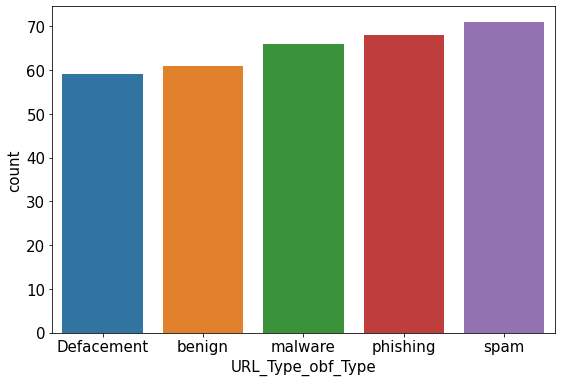

In [ ]:
#Visual Representation of label types
fig = plt.figure()
fig.set_size_inches(9, 6)
plt.rcParams.update({'font.size':15})
sns.countplot(x=dep_var,data=df)
plt.show()

In [ ]:
# function loads, cleans and returns panda dataframe
# strip whitespace from column names, drops samples/rows with Infinity and NaN values

def loadAndCleanData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)
        # clean data
        # strip the whitspaces from column names
        df = df.rename(str.strip, axis='columns')
        #df.drop(columns=[], inplace=True)
        # drop missing values/NaN etc.
        #df.dropna(inplace=True)
        # drop Infinity rows and NaN string from each column
        for col in df.columns:
            indexNames = df[df[col] == 'Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]== 'NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        df['argPathRatio'].astype('float')
        # drop NaN pandas way
        beforeRows = df.shape[0]
        df.dropna(inplace = True)
        print('Dropped {} rows with NaN values'.format(beforeRows - df.shape[0]))
        df.to_pickle(pickleDump)
        
    return df

In [ ]:
df1 = loadAndCleanData('MachineLearning/All.csv')

Dropped 196 rows with NaN values


In [ ]:
print(df1.groupby('URL_Type_obf_Type').size())

URL_Type_obf_Type
Defacement    22
benign        15
malware       21
phishing      13
spam          58
dtype: int64


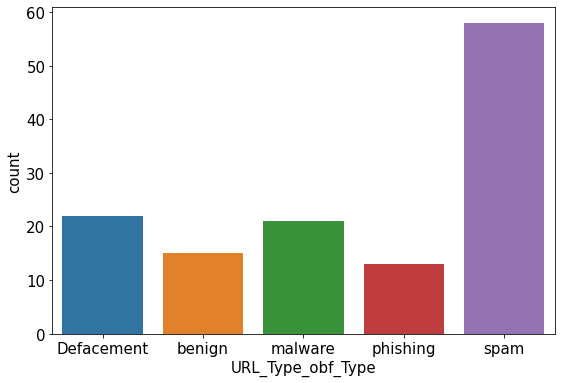

In [ ]:
#Visual Representation of label type after data clean-up
fig = plt.figure()
fig.set_size_inches(9, 6)
plt.rcParams.update({'font.size':15})
sns.countplot(x=dep_var,data=df1)
plt.show()

In [ ]:
#Creating a validation dataset which will be used to test our model to see how good it is!
#Use 80/20 split 80% of samples used for training and 20% held back for validation
# Split-out validation dataset
def splitDataset(df):
    array = df.values
    X = array[:,0:79]
    Y = array[:,79]
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                    test_size=validation_size, 
                                                                                    random_state=random_seed)
    return X_train, X_validation, Y_train, Y_validation
    

In [ ]:
#Evaluate Models
'''Use 10-fold cross validation to estimate accuracy results, split out dataset into 10 parts, 
train on 9 and test on 1 and repeat for all combination of train-test splits and calculate the average accuracy'''

def runExperiments(X_train, Y_train):
    #random_seed = 100
    scoring = 'accuracy'
    models = []
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn using 10-fold cross-validation
    results = []
    classifiers = []
    accuracies = []
    for classifier, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=100)
        #kfold = model_selection.KFold(n_splits=10, random_state=random_seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        accuracies.append((cv_results.mean(), classifier))
        results.append(cv_results)
        classifiers.append(classifier)
        msg = "%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std())
        print(msg)
    return results, accuracies, classifiers

In [ ]:
X_train, X_validation, Y_train, Y_validation = splitDataset(df1)
results, accuracies, classifiers = runExperiments(X_train, Y_train)

DT: 0.890000 (0.094340)


In [ ]:
def decisionT(accuracies, results, classifiers):
    # sort the mean accuracy results in descending order and print
    accuracies.sort(reverse=True)
    for acc, cls in accuracies:
        print("{} {:.2f}".format(cls, acc))
    # Compare Algorithms using box-plot
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()

DT 0.89


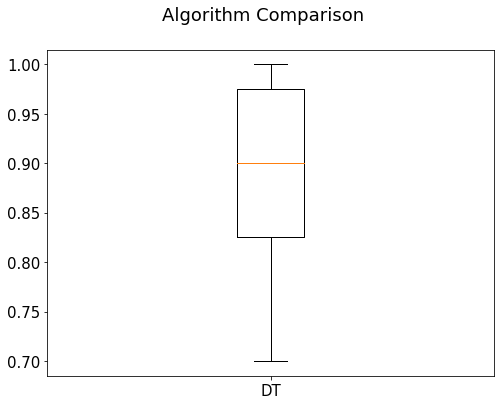

In [ ]:
#Plot accuracy with box-plot
decisionT(accuracies, results, classifiers)

# New Section